# ANALYZING POLICE ACTIVITY WITH PANDAS

# 1-) Preparing the Data for Analysis (Veriyi Analiz İçin Hazırlama)

Analizimize başlamadan önce, onunla çalışmayı daha verimli bir süreç haline getirmek için önce veri kümesini incelememiz ve temizlememiz çok önemlidir. Bu bölümde, Stanford Açık Polislik Projesi veri kümesini öğrenirken veri türlerini düzeltme, eksik değerleri işleme ve sütunları ve satırları bırakma alıştırmaları yapacağız.

Bir analize başlamadan önce, emin olmak için verileri incelememiz çok önemlidir.

Ardından, veriyle çalışmayı daha verimli bir süreç haline getirmek için verileri temizlememiz gerekir.

### < Stanford Open Policing Project Dataset (Stanford Açık Polislik Projesi Veri kümesi) >

Stanford üniversitesinin açık olarak hazırladığı Polislik Projesi Veri Kümesindeki NaN (missing) değerleri bulup onları temizleyeceğiz.

Bu başlık altında kullandığımız tüm işlevler ve Tutorial Linkleri:

+ pd.read_csv() = https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

+ pd.DataFrame.head() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

+ pd.DataFrame.shape = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?highlight=shape

+ pd.DataFrame.isnull() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html?highlight=isnull

+ pd.DataFrame.drop() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?highlight=drop#pandas.DataFrame.drop

+ pd.DataFrame.dropna() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html?highlight=dropna#pandas.DataFrame.dropna

Aşağıdaki kod bloğunda, Pandas paketini içe aktarıp **"pd.read_csv()"** ile istediğimiz dosyaları DataFrame olarak değişkenlere atayacağız. Ardından atadığımız değişkenlerdeki DataFrame'ler hakkında **"xx.head()"** ile ve **"xx.shape"** ile bilgi edineceğiz.

In [1]:
# Pandas'ı içe aktaralım 
import pandas as pd

# "police.csv" dosyasını bir DataFrame olarak police adlı değişkene atayalım
police = pd.read_csv("police.csv")

# police DataFrame'inin ilk 3 satırını döndürelim ve satır-sütun sayısını görelim
print(police.head(3))
print("police dataframe shape : ", police.shape)

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   

  stop_outcome is_arrested stop_duration  drugs_related_stop district  
0     Citation       False      0-15 Min               False  Zone X4  
1     Citation       False      0-15 Min               False  Zone K3  
2     Citation       False      0-15 Min               False  Zone X4  
police dataframe shape :  (91741, 15)


Pandas'ın **"xx.isnull()"** işlevinin sonuna **"xx.sum()"** işlevini ekleyerek sütunlarda kaç adet NaN (missing) değer var onu görüntüleyelim.

In [2]:
police.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

+ police Dataframe'inin 91741 satırı var ve county_name sütununda 91741 adet NaN değer mevcut. Yani burada hiçbir veri yok, bu yüzden işimize yaramayacak. Ayrcıa tüm trafik duraklamaları tek bir eyalette (Rhode Island) gerçekleştiği için eyalet sütunu da işimize yaramayacak. Verinin analiz edilebilirliğini atırmak için bu iki sütunu bırakalım.

Aşağıdaki kod bloğunda Pandas'ın **"xx.drop()"** işlevini kullanarak county_name ve state sütunlarını bırakalım. Bırakmadan önce **"xx.shape"** işlevi ile satır-sütun sayısını görüntüleyelim, bir de bıraktıktan sonra görüntüleyelim.

In [3]:
# sütunları bırakmadan önce satır-sütun sayısı
print("police dataframe shape : ", police.shape)

# county_name ve state sütunlarını bırakalım
# sütunları bıraktığımızı belirtmek için axis parametresini "columns" olarak ayarlayalım
# police dataframe'i bıraktıktan sonra eski haline dönmesin diye inplace = True olarak ayarlayalım
police.drop(["county_name", "state"], axis = "columns", inplace = True)

# sütunları bıraktıktan sonra satır-sütun sayısı
print("police dataframe shape : ", police.shape)

police dataframe shape :  (91741, 15)
police dataframe shape :  (91741, 13)


+ Görüleceği üzere sütunları bırakmadan önce 15, bıraktıktan sonra 13 sütun kaldı. İşimize yaramayacak sütunları bıraktıktan sonra, sıra satırlara geldi. Bizim için önem arz eden sütunlarda (driver_gender) NaN değer içeren satırları bırakalım.

!! : stop_time ve stop_date sütunları da analizimiz için çok önemli ancak o sütunlarda NaN değeri olmadığından dolayı **"xx.dropna()"** işlevini bu iki sütunda kullanmamıza gerek yok. 

Aşağıdaki kod bloğunda Pandas'ın **"xx.dropna()"** işlevi ile driver_gender sütunundaki NaN değer içeren satırları bırakalım. 

In [4]:
# bırakmadan önce sütunlardaki NaN sayısını görelim
print(police.isnull().sum())

# driver_gender sütunundaki NaN içeren satırları bırakalım
police.dropna(subset = ["driver_gender"], inplace = True)

print("\n*****\n")

# bıraktıktan sonra sütunlardaki NaN sayısını görelim
print(police.isnull().sum())

# satır-sütun sayısını görüntüleyelim
print("police dataframe shape : ", police.shape)

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

*****

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
police dataframe shape :  (86536, 13)


+ NaN satırlar bırakılınca driver_gender sütunundaki NaN sayısı 5205 iken 0 oldu, satır sayısı 91741 iken 86536 oldu.

### < Using Proper Data Type (Uygun Veri Tipini Kullanma) >  

Bu bölümde, sütunların her birinin uygun veri türüne sahip olduğundan emin olarak veri kümesini temizlemeye devam edeceğiz.

Bu başlık altında kullandığımız bütün işlevler ve Tutorial Linkleri: 

+ pd.DataFrame.dtypes = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html?highlight=dtypes#pandas.DataFrame.dtypes

+ pd.DataFrame.astype() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

Her sütunun veri tipini tespit etmek için Pandas'ın **"xx.dtypes"** işlevini kullanacağız.

In [5]:
police.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

+ Görüleceği üzere şu anda kullanımda olan veri türleri sadece object ve bool'dur. "is_arrested" sütununun object değil de bool olması gerekir.

Veri tipini değiştirmek istediğimiz sütunun, veri tipini değiştirmek için Pandas'ın **"xx.astype()"** işlevini kullanacağız. İlk olarak is_arrested sütunun ilk birkaç satırını döndürelim ardından veri tipini değiştirelim. Son olarak **"xx.dtypes"** ile is_arrested sütununun veri tipini görüntüleyelim.

In [6]:
# is_arrested sütunuyla ilgili bilgi edinelim
print(police.is_arrested.head())

# is_arrested sütununu bool olarak ayarlayalım ve dtype kullanarak kontrol edelim
police["is_arrested"] = police.is_arrested.astype("bool")
print("is_arrested column dtype : ",police["is_arrested"].dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
is_arrested column dtype :  bool


### < Creating a DatetimeIndex (DatetimeIndex Oluşturma) >

Bu bölümde DataFrame'imiz için bir DatetimeIndex oluşturacağız. Pandas DatetimeIndex.date özniteliği, DatetimeIndex nesnesinin girişlerinin her birinde bulunan tarih değerlerini içeren bir Index nesnesi çıkarır.

Bu başlık altında kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.Series.str.cat = https://pandas.pydata.org/docs/reference/api/pandas.Series.str.cat.html

+ pd.DataFrame.set_index() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html?highlight=set_index#pandas.DataFrame.set_index

Her bir trafik durağının tarih ve saati, her ikisi de nesne sütunları ayrı olan sütunlarda saklanır. Analizimide stop_date ve stop_time sütunlarını kullancağımız için bu iki sütunu birleştirelim ve o sütunu Pandas'ın tarih-saat biçimine (Datetime) dönüştürelim. Bu yararlı olacaktır çünkü object tipindeki sütunların aksine, Datetime tipindeki sütunlar, analizimizi kolaylaştıracak tarihe dayalı nitelikler sağlayacaktır.

Aşağıdaki kod bloğunda, stop_date ve stop_time sütunlarını birleştirelim ve birleştirdiğimiz sütunu Pandas'ın "Datetime" biçiminbe dönüştürelim. Birleştirmek için Pandas'ın **"xx.str.cat()"** işlevini, Datetime biçimine dönüştürmek için Pandas'ın **xx.to_datetime()** işlevini kullanacağız. Son olarak da police DataFrame'inin sütunlarının veri tiplerine göz atalım.

In [7]:
# stop_date ve stop_time sütunlarını birleştirelim ve combined adlı değişkene atayalım
# sep = " " parametresini bu şekilde ayarlayınca, iki sütunu birleştirmesini aralarını boşlukla ayırmasını söylüyoruz.
combined = police["stop_date"].str.cat(police["stop_time"], sep = " ")

# combined değişkeninin veri tipini Datetime olarak ayarlayalım
# ve bunu stop_datetime isimli bir sütun olarak police DataFrame'ine ekleyelim
police["stop_datetime"] = pd.to_datetime(combined)

# sütunların veri tiplerine göz atalım 
print(police.dtypes)
print("\n********\n")
print(police["stop_datetime"])

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

********

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Name: stop_datetime, Length: 86536, dtype: datetime64[ns]


+ Son adım olarak stop_datetime sütununu index olarak ayarlayalım.

Aşağıdaki kod bloğunda, stop_datetime sütununu **"xx.set_index()"** ile index olarak ayarlayalım ve police DataFrame'ine göz atalım.

In [8]:
# stop_datetime sütununu, index olarak ayarlayalım
police.set_index("stop_datetime", inplace=True)

# police DataFrame'ine göz atalım
police.head(3)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


+ Görüleceği üzere stop_datetime sütunu index olmuş durumda.

# 2-) Exploring the Relationship Between Gender and Policing (Cinsiyet ve Polislik Arasındaki İlişkiyi Keşfetmek)

Bir sürücünün cinsiyetinin trafik durması sırasında polisin davranışı üzerinde bir etkisi var mı? Bu bölümde filtreleme, gruplama, yöntem zincirleme, Boole matematiği, dizi yöntemleri ve daha fazlasını uygularken bu soruyu keşfedeceğiz.

### < Do the Genders Commit Different Violations? (Cinsiyetler Farklı İhlaller Yapıyor Mu?) > 

Bu bölümde, police Dataframe'indeki violation sütununu kullanarak her iki cinsiyetin aldıkları ihlallerin oranını karışık bir şekilde ve her cinsiyete özel olacak şekilde inceleyeceğiz.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.Series.value_counts() = https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

Aşağıdaki kod bloğunda police DataFrame'indeki, violation (ihlal türlerinin olduğu sütun) sütunundaki eşsiz değerlerin kaç tane olduğunu Pandas'ın **"xx.value_counts()"** işlevi ile görelim.

In [9]:
print(police["violation"].value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


+ İhlal çeşitleri ve her bir ihlalin kaç kez yapıldığını görüyoruz.

Aşağıdaki kod bloğunda **"xx.value_counts()"** işlevinin **"normalize" parametresini** True olarak ayarlayalım ve trafik duraklarının yüzdelerini görelim

In [10]:
print(police["violation"].value_counts(normalize = True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


+ İhlal çeşitlerini ve her bir ihlalin yüzde olarak ne kadar yapıldığını görüyoruz. Bu şekildeki sonuçlar, yorumlama yaparken yüzdelik olarak yapmamıza olanak tanır.

Aşağıdaki kod bloğunda, driver_gender (sürücülerin cinsiyetlerinin olduğu sütun) adlı sütundaki M satırlarını male adlı değişkene, F satırlarını female adlı değişkene atayalım ve bu iki değişkenin ilk 3 satırını görünteleyelim.

In [11]:
female = police[police["driver_gender"] == 'F']
male = police[police["driver_gender"] == 'M']
print(male.head(3))
print("\n*****\n")
print(female.head(3))

                      stop_date stop_time driver_gender driver_race  \
stop_datetime                                                         
2005-01-04 12:55:00  2005-01-04     12:55             M       White   
2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2005-02-17 04:15:00  2005-02-17     04:15             M       White   

                                      violation_raw  violation  \
stop_datetime                                                    
2005-01-04 12:55:00  Equipment/Inspection Violation  Equipment   
2005-01-23 23:15:00                        Speeding   Speeding   
2005-02-17 04:15:00                        Speeding   Speeding   

                     search_conducted search_type stop_outcome  is_arrested  \
stop_datetime                                                                 
2005-01-04 12:55:00             False         NaN     Citation        False   
2005-01-23 23:15:00             False         NaN     Citation        False 

Aşağıdaki kod bloğunda, oluşturduğumuz male ve female isimli DataFrame'lerdeki violations sütununa **"xx.value_counts()"** işlevini uygulayalım.

In [12]:
print(male["violation"].value_counts(normalize = True))
print("\n******\n")
print(female["violation"].value_counts(normalize = True))

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64

******

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64


+ Yukarıdaki ilk sonuçta erkeklerin yaptığı ihlal çeşitlerinin oranlarını, aşağıdaki sonuçta da kadınlarınkini görüyoruz.

### < Does Gender Affect Who Gets a Ticket For Speeding? (Cinsiyet, Kimin Hız Cezası Aldığını Etkiler mi?) >  

Cinsiyet, kimin hız cezası aldığını etkiler mi? Bu bölümde bu soruya yanıt arayacağız. Bu analiz için ek bir teknik kullanmamız gerekecek. Bir DataFrame'i birden çok koşula göre filtreleyeceğiz ve ilişkiyi analiz etmek için cinsiyet-hız arasındaki korelasyonu hesaplayacağız.

Bir önceki bölümde oluşturduğumuz female adlı değişkende driver_gender sütunundaki değerlerin sadece F olanları vardı. Daha da ayrıntıya inip :

"Tutuklanan kadınları" bir değişkene DataFrame olarak atayalım. Bunu **"AND (&)"** operatörü ile yapabiliriz.

**"OR (|)"** operatörü ile hem tutuklanan hem de kadın olan satırları bir değişkene atayabiliriz.

Aşağıdaki kod bloğunda, driver_gender sütununda F ve M olan satırları ve violation sütununda Speeding olan satırları ayrı ayrı DataFrame olacak şekilde değişkenlere atayalım. 

In [13]:
# hız nedeniyle durdurulan kadın sürücülerden oluşan bir DataFrame oluşturalım
female_and_speeding = police[(police["driver_gender"] == "F") & (police["violation"] == "Speeding")]

# hız nedeniyle durdurulan erkek sürücülerden oluşan bir DataFrame oluşturun
male_and_speeding = police[(police["driver_gender"] == "M") & (police["violation"] == "Speeding")]

# kadın sürücüler için durma sonuçlarını hesaplayalım (oran olarak)
print(female_and_speeding["stop_outcome"].value_counts(normalize = True))

print("\n*****\n")

# erkek sürücüler için durma sonuçlarını hesaplayalım (oran olarak)
print(male_and_speeding["stop_outcome"].value_counts(normalize = True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

*****

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


+ Yukarıda, driver_gender (sürücü cinsiyeti) sütunundaki kadın ve erkeklerin violation (ihlal çeşitleri) sütunundaki "Speeding" ihlalini yapanları ayrı ayrı değişkenlere atadık. Atadağımız bu değişkenler de artık yeni bir Dataframe olmuş oldu. Bu yeni Dataframe'lerin de stop_outcome sütunlarındaki değerlerin ortalamasını aldık

### < Does Gender Affect Whose Vehicle Is Searched (Cinsiyet, Aracı Aranan Kişiyi Etkiler mi?) >  

Bu bölümde, arama oranı olarak da bilinen bir araç aramasıyla sonuçlanan police DataFrame'deki tüm durakların yüzdesini hesaplayacağız.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ np.mean() = https://numpy.org/doc/stable/reference/generated/numpy.mean.html

+ np.unique() = https://numpy.org/doc/stable/reference/generated/numpy.unique.html

+ pd.DataFrame.groupby() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

Bir sütundaki benzersiz satırların ne olduğunu görmek için Numpy'ın **"xx.unique()"** işlevini kullanabiliriz.

Aşağıdaki kod bloğunda, police Dataframe'indeki search_conducted sütununun veri tipini görüntüleyelim. Ardından ilk önce Pandas'ın **"xx.value_counts()"** işlevi ile search_conducted sütunundaki oranları görüntüleyelim. Daha sonra da Numpy'ın **"xx.mean()"** işlevi ile oranları görüntüleyelim. Bakalım aynı sonuçları verecekler mi? (Vermeliler)

In [14]:
# search_conducted sütununun veri tipini kontrol edelim
print(police["search_conducted"].dtype)

print("\n*****\n")

# xx.value_counts() ile search_conducted sütunundaki oranları döndürelim
print(police["search_conducted"].value_counts(normalize = True))

print("\n*****\n")

# xx.mean() işlevi ile search_conducted sütunundaki oranları döndürelim
print(police["search_conducted"].mean())

bool

*****

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64

*****

0.0382153092354627


+ Boolean bir serinin ortalamasını aldık. True = 1 ve False = 0 olarak sayıldığından dolayı bu mümkündür. Boolean bir serinin ortalaması, True olan değerlerin yüzdesini temsil eder.

Aşağıdaki kod bloğunda, driver_gender sütununda F olarak ve M olarak eşleşen satırların search_conducted sütununda karşılık gelen değerlerinin ortalamasını uzun yoldan hesaplayalım. Ardından da Pandas'ın **"xx.groupby()"** işlevi ile hesaplayalım.

In [15]:
# kadın sürücüler için arama oranını hesaplayalım
print(police[police["driver_gender"] == 'F']["search_conducted"].mean())

# erkek sürücüler için arama oranını hesaplayalım
print(police[police["driver_gender"] == 'M']["search_conducted"].mean())

print("\n*****\n")

# xx.groupby() işlevi ile bütün driver_gender sütununu hesaplayalım
print(police.groupby("driver_gender")["search_conducted"].mean())

0.019180617481282074
0.04542557598546892

*****

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


Aşağıdaki kod bloğunda, her bir cinsiyet (driver_gender sütunu) ve ihlal (violation sütunu) kombinasyonu için arama oranını hesaplamak üzere bir **"xx.groupby()"** işlevini kullanalım. Erkekler ve kadınlar her ihlal için yaklaşık olarak aynı oranda mı aranıyor görelim.

In [16]:
print(police.groupby(["driver_gender", "violation"])["search_conducted"].mean())

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64


Aşağıdaki kod bloğunda, cinsiyetten (driver_gender sütunu) önce ihlale (violation sütunu) göre gruplamak için sıralamayı tersine çevirin. Bu şekilde sunulduğunda sonuçları karşılaştırmak daha kolay olabilir.

In [17]:
print(police.groupby(["violation", "driver_gender"])["search_conducted"].mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


+ **"xx.groupby()"** işlevinden sonra köşeli parantez ( [ ] ), içinde yazdığımız sütun adı, hangi sütundaki değerlere işlem yapacağımızı belirtiyor.

### < Does Gender Affect Who Is Frisked During a Search? (Cinsiyet,  Arama Esnasında Kimin Arandığını Etkiliyor mu?) > 

Bu bölümde arama sırandaki durumla ilgileneceğiz.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.Series.str.contains = https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html 

Aşağıdaki kod bloğunda, **"xx.value_counts()"** ile search_conducted ve search_type sütunlarındaki benzersiz değerlerin sayısına bakalım.

In [18]:
print(police["search_conducted"].value_counts())
print("\n*****\n")
print(police["search_type"].value_counts(dropna = False))

False    83229
True      3307
Name: search_conducted, dtype: int64

*****

NaN                                                         83229
Incident to Arrest                                           1290
Probable Cause                                                924
Inventory                                                     219
Reasonable Suspicion                                          214
Protective Frisk                                              164
Incident to Arrest,Inventory                                  123
Incident to Arrest,Probable Cause                             100
Probable Cause,Reasonable Suspicion                            54
Incident to Arrest,Inventory,Probable Cause                    35
Probable Cause,Protective Frisk                                35
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       25
Protective Frisk,Reasonable Suspicion                          19
I

+ search_conducted sütunu (arama var mı yok mu onu belirten sütun) ve search_type (aramayla ilgili ek bilgi içeren sütun) ile ilgileneceğiz. search_type sütunundaki NaN sayısının, search_conducted ile aynı olduğuna dikkat edelim. Araç durdurulduğunda arama yapılmazsa False olacaktır ve arama ile ilgili bir bilgi olamayacaktır. Bu yüzden de search_type sütununa NaN olarak geçecektir.

Aşağıdaki kod bloğunda, ilk olarak police Dataframe'indeki search_type sütunundaki benzersiz değerlerin kaç tane olduğunu Pandas'ın **"xx.value_counts()"** işlevi ile görelim. Ardından police Dataframe'ine "frisk" isimli bir sütun ekleyelim. Bu sütun, search_type sütunundaki tek arama türü "Protective Frisk" değerlerinin olduğu satırları barındırsın. Bunu Pandas'ın **"xx.str.contains()"** işlevi ile yapabiliriz. Ardından eklediğimiz frisk sütununun veri tipini ve kaç tane True değer içerdiğini görelim.

In [19]:
# Count the 'search_type' values
print(police["search_type"].value_counts())

print("\n*****\n")

# Check if 'search_type' contains the string 'Protective Frisk'
police['frisk'] = police["search_type"].str.contains('Protective Frisk', na= False)

# Check the data type of 'frisk'
print(police["frisk"].dtype)

print("\n*****\n")

# Take the sum of 'frisk'
print(police["frisk"].sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

Aşağıdaki kod bloğunda, search_conducted == True olan satırları searched adlı değişkene atayalım. Arından oluşturduğumuz "frisk" sütununun ortalamasını alarak genel frisk oranını hesaplayalım. Son olarak da **"xx.groupby()"** işlevi ile driver_gender sütunundaki her değer için frisk sütununun ortalamasını hesaplayalım.

In [20]:
# bir aramanın yürütüldüğü duraklardan oluşan bir DataFrame oluşturalım
searched = police[police["search_conducted"] == True]

# 'frisk'in ortalamasını alarak genel frisk oranını hesaplayalım
print(searched["frisk"].mean())

print("\n*****\n")

# her cinsiyet için frisk oranını hesaplayın
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065

*****

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


# 3-) Visual Exploratory Data Analysis (Görsel Keşifsel Veri Analizi) 

Günün belirli bir saatinde tutuklanma olasılığınız daha mı yüksek? Uyuşturucuyla ilgili duraklamalar artıyor mu? Bu bölümde, veri setini görsel olarak analiz ederek bu ve diğer soruları cevaplayacağız çünkü grafikler, ham verileri incelemenin yapamayacağı şekilde eğilimleri anlamanıza yardımcı olabilir.

### < Does Time of Day Affect Arrest Rate? (Günün Saati, Tutuklanma Oranını Etkiler mi?) > 

Günün saati, tutuklanma oranını etkiler mi? Bu bölümde bu soruyu grafikler oluşturarak yanıtlamaya çalışacağız.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.Series.dt.month = https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html

+ pd.DatetimeIndex.hour = https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.hour.html

Bir polis memuru bir sürücüyü durdurduğunda, bu duraklamaların küçük bir yüzdesi tutuklanmayla sonuçlanıyor. Bu tutuklama oranı olarak bilinir. Bu alıştırmada, tutuklama oranının günün saatine göre değişip değişmediğini öğreneceğiz.

Aşağıdaki kod bloğunda, önce is_arrested (durdurulan kişi tutuklanmış mu tutuklanmamış mı True ve False ile gösteren sütun) sütununun ortalamasını **"xx.mean()"** ile hesaplayalım. Daha sonra Pandas'ın **"xx.index.hour()"** işlevi ile saatlik tutuklama oranını hesaplayacağız. Son olarak da hesapladığımız bu sonucu hourly_arrest_rate adlı değişkene atayacağız.

In [21]:
# genel tutuklama oranını hesaplayalım
print(police["is_arrested"].mean())

print("\n*****\n")

# saatlik tutuklama oranını hesaplayalım
print(police.groupby(police.index.hour)["is_arrested"].mean())

# saatlik tutuklama oranını değişkene atayalım 
hourly_arrest_rate = police.groupby(police.index.hour)["is_arrested"].mean()

0.0355690117407784

*****

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


Aşağıdaki kod bloğunda, hourly_arrest_rate adında tutuklanma oranının günün saatine göre oranını atadığımız değişkenin grafiğini çizeceğiz.

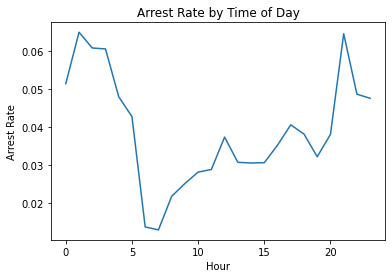

In [22]:
# matplotlib.pyplot'u içe aktaralım
import matplotlib.pyplot as plt 

# hourly_arrest_rate'in line plot'unu çizelim
hourly_arrest_rate.plot()

# xlabel, ylabel ve title ekleyelim
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

# grafiği gösterelim
plt.show()

+ Tek bir değişkenin (arrest rate) zaman içinde nasıl değiştiğinin grafiği çizdik.

### < Are Drug-Related Stops On The Rise? (Uyuşturucuyla ilgili duraklamalar artıyor mu?) > 

Bu bölümde, zaman içinde iki değişken arasındaki ilişikiyi gözlemleyeceğiz.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.DataFrame.resample() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

+ pd.concat() = https://pandas.pydata.org/docs/reference/api/pandas.concat.html

Trafik durdurmalarının küçük bir bölümünde yapılan aramalarda araçta uyuşturucu madde bulundu. Bu alıştırmada, uyuşturucuyla ilgili bu durmaların zaman içinde daha yaygın hale gelip gelmediğini değerlendireceğiz.

Aşağıdaki kod bloğunda, drugs_related_stop Boolean sütunu (belirli bir durdurma sırasında uyuşturucu bulunup bulunmadığını belirtir) bu sütunu yeniden örnekleyerek yıllık ilaç oranını hesaplayacak ve ardından oranın zaman içinde nasıl değiştiğini görselleştirmek için bir çizgi grafiği çizeceğiz. Yeniden örnekleme işlemini Pandas'ın **"xx.resample()"** işlevi ile yapacağız. Yeniden örneklediğimiz sonucu da annual_drug_rate isimli bir değişkene atayacağız.

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


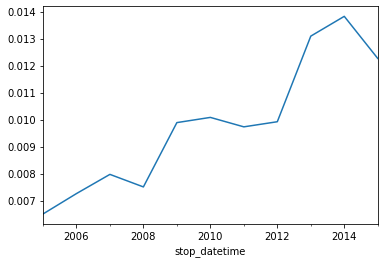

In [23]:
# uyuşturucuya bağlı durdurmaların yıllık oranını hesaplayalım
print(police["drugs_related_stop"].resample("A").mean())

# uyuşturucuya bağlı durmaların yıllık oranını annual_drug_rate adlı değişkene atayalım
annual_drug_rate = police["drugs_related_stop"].resample("A").mean()

# annual_drug_rate'in çizgi grafiğini oluşturalım
annual_drug_rate.plot()

# grafiği gösterelim
plt.show()

+ Yıllık ilaç oranındaki tarihlerin 12. ayın son günü olduğuna dikkat edelim.

Aşağıdaki kod bloğunda, annual_search_rate adlı değişkene search_conducted (arama yapılıp yapılmadığını gösteren sütun) sütununun yeniden örneklenmiş ve yıllık arama oranını hesaplanmış halini atayacağız. Daha sonra annual adlı değişkene Pandas'ın **"xx.concat"** işlevini kullanarak yukarıda oluşturduğumuz annual_drug_rate sütunu ve annual_search_rate sütununu birleştireceğiz. Son olarak da annul değişkeninin grafiğini çizdireceğiz. Grafiği çizdiriken **"xx.plot()"** işlevinin, **subplots** parametresini True olarak ayarlayacağız ki grafikleri tek bir tabloda çizmek yerine ayrı ayrı çizsin.

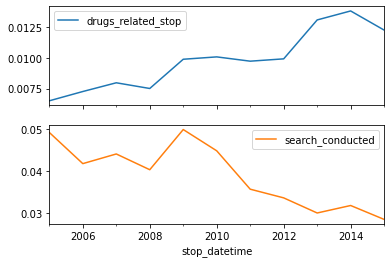

In [24]:
# yıllık arama oranını hesaplayın ve kaydedelim
annual_search_rate = police["search_conducted"].resample("A").mean()

# "annual_drug_rate" ve "annual_search_rate" öğelerini birleştirelim
annual = pd.concat([annual_drug_rate, annual_search_rate], axis="columns")

# Create subplots from 'annual'
annual.plot(subplots = True)

# Display the subplots
plt.show()

### < What Violations Are Caught in Each District? (İlçelerde Hangi İhlaller Yakalanıyor) >   

Bu bölümde, bölgelere göre ihlalleri grafikleştireceğiz.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.crosstab() = https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html

Aşağıdaki kod bloğunda, altı bölgenin her birinde her türden kaç ihlalin gerçekleştiğini belirlemek için police Dataframe'indeki district (bölgelerin olduğu sütun) ve violation (ihlal türlerinin olduğu sütun)'dan oluşan bir sıklık tablosunu Pandas'ın **"xx.crosstab()"** işlevi ile oluşturacağız ve all_zones adlı değişkene atayacağız. Ardından, oluşturduğumuz tabloyu **"xx.loc[ ]"** ile Zone K1'den, Zone K3'e kadar filtreleyeceğiz. Filtrelememizi de k_zones adlı değişkene atayacağız.

In [25]:
# bölgeler (district sütunu) ve ihlaller (violation sütunu) için bir sıklık tablosu oluşturun
print(pd.crosstab(police["district"], police["violation"]))

# 'all_zones' adlı değişkene oluşturduğumuz frekans tablosunu atayalım
all_zones = pd.crosstab(police["district"], police["violation"])

print("\n******\n")

# Zone K1'den, Zone K3'e kadar olan kısımları filtreleyelim (seçelim)
print(all_zones.loc["Zone K1" : "Zone K3"])

# filtrelememizi k_zones adlı değişkene atayalım
k_zones = all_zones.loc["Zone K1" : "Zone K3"]

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  

******

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone

Aşağıdaki kod bloğunda, k_zones olarak oluşturduğumuz değişkenin bar grafiğini çizelim ve bölgelere göre ihlallerin ne kadar yapıldığını görselleştirmiş olalım.

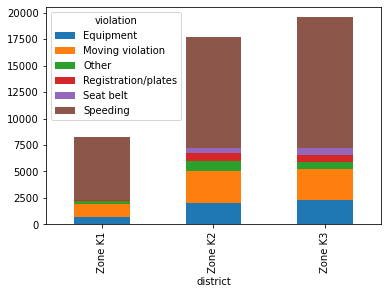


*****



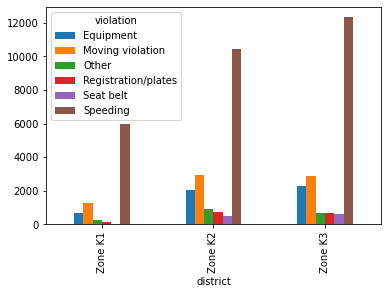

In [26]:
k_zones.plot(kind = "bar", stacked = True)
plt.show()

print("\n*****\n")

k_zones.plot(kind = "bar")
plt.show()

### < How Long Might You Be Stopped For a Violation? (Bir ihlal nedeniyle ne kadar süreyle durdurulabilirsiniz?) > 

police veri setinde, stop_duration sütunu, sürücünün memur tarafından yaklaşık olarak ne kadar süreyle gözaltında tutulduğunu size söyler. Maalesef süreler '0-15 Dak' gibi diziler halinde saklanıyor. Bu verilerin analiz edilmesini kolaylaştırmamız lazım. Bu bölümde bunu yapıp grafik ile görselleştireceğiz.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.Series.map() = https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html?highlight=map%209

+ pd.Series.unique() = https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html?highlight=unique#pandas.Series.unique

+ pd.DataFrame.sort_values() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html?highlight=sort_values#pandas.DataFrame.sort_values

Aşağıdaki kod bloğunda, durma sürelerini **"xx.map()"** işlevi ile tam sayılara çevireceğiz. Kesin süreler mevcut olmadığından, sayıları makul değerler kullanarak tahmin etmemiz gerecek. Tam sayılara dönüşmüş haldeki sütunu stop_minutes adlı bir sütun olarak oluşturacağız ve son olarak bu sütundaki eşsiz değerleri **"xx.unique()"** işlevi ile döndüreceğiz.

In [27]:
# 'stop_duration' içindeki benzersiz değerleri yazdıralım
print(police["stop_duration"].unique())

# dizeleri tam sayılara eşleyen bir sözlük oluşturalım
mapping = {"0-15 Min" : 8, "16-30 Min" : 23, "30+ Min" : 45}

# mapping'i kullanarak 'stop_duration' dizelerini tam sayılara dönüştürün
police['stop_minutes'] = police["stop_duration"].map(mapping)

# benzersiz değerleri 'stop_ minutes' için yazdıralım
print(police["stop_minutes"].unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


+ Görüleceği üzere stop_duration'daki string olarak aralık belirten dakikalar, stop_minutes adlı sütunda integer olarak tam sayı değer belirtiyorlar.

Aşağıdaki sütunda, violation_raw sütunundaki stop_minutes sütununa denk gelen değerlerin ortalaması alalım ve stop_length adlı bir değişkene atayalım. Ardından **xx.sort_values()** işlevi ile küçükten büyüğe sıralayıp bar grafiği çizelim.

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


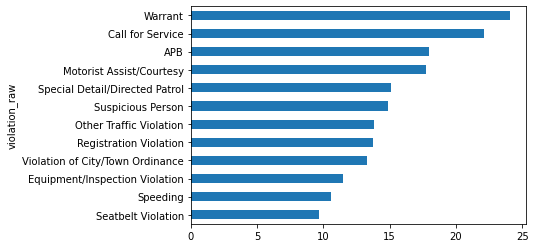

In [28]:
# "violation_raw" içindeki her değer için ortalama "stop_minutes"ı hesaplayalım
print(police.groupby("violation_raw")["stop_minutes"].mean())

# ortaya çıkan Seriyi 'stop_length' olarak kaydedelim
stop_length = police.groupby("violation_raw")["stop_minutes"].mean()

# 'stop_length' değerini değerlerine göre sıralayalım ve yatay bir çubuk grafiği oluşturalım
stop_length.sort_values().plot(kind = "barh")

# grafiği gösterelim
plt.show()

# 4-) Analyzing the Effect of Weather on Policing (Hava Durumunun Polislik Üzerindeki Etkisini Analiz Etmek)

Bu bölümde, trafik durdurmaları sırasında hava koşullarının polis davranışları üzerindeki etkisini keşfetmek için ikinci bir veri kümesi kullanacağız. Veri kümelerini birleştirme ve yeniden şekillendirme, bir veri kaynağının güvenilir olup olmadığını değerlendirme, kategorik verilerle çalışma ve diğer ileri düzey beceriler üzerinde pratik yapacağız.

### < Exploring the Weather Dataset (Hava Durumu Veri Setini Keşfetmek) >

Trafik durdurmaları sırasında hava koşullarının polis davranışlarını nasıl etkilediğini görmek için weather adlı bir Dataframe ile daha çalışacağız. Bu Dataframe, National Centers for Environmental Information (Ulusal Çevresel Bilgi Merkezleri) tarafından toplanmıştır. Bu bölümde, weather Dataframe'ini inceleyeceğiz.

Aşağıdaki kod bloğunda, "weather.csv" adlı dosyayı içe aktaralım ve Dataframe'i inceleyelim.

In [29]:
import pandas as pd

weather = pd.read_csv("weather.csv")
print(weather.head(3))
print("\n*****\n")
print("weather dataframe shape : ", weather.shape)

       STATION        DATE  TAVG  TMIN  TMAX  AWND  WSF2  WT01  WT02  WT03  \
0  USW00014765  2005-01-01  44.0    35    53  8.95  25.1   1.0   NaN   NaN   
1  USW00014765  2005-01-02  36.0    28    44  9.40  14.1   NaN   NaN   NaN   
2  USW00014765  2005-01-03  49.0    44    53  6.93  17.0   1.0   NaN   NaN   

   ...  WT11  WT13  WT14  WT15  WT16  WT17  WT18  WT19  WT21  WT22  
0  ...   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  ...   NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN  
2  ...   NaN   1.0   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN  

[3 rows x 27 columns]

*****

weather dataframe shape :  (4017, 27)


+ TAVG, TMIN, TMAX = Sıcaklıkla alakalı olan sütunlar

  AWND, WSF2 = Rüzgar hızıyla alakalı olan sütunlar
  
  WT01....WT22 = Kötü hava koşullarının varlığı ile ilgili sütunlar
 

Aşağıdaki kod bloğunda, sıcaklıkla alakalı olan sütunları **"xx.describe()"** işlevi ile tanımlayıcı istatistik sonuçlarını döndürelim ve Dataframe'e olan güveni artırmak adına bir boxplot (kutu grafiği) çizelim ve aykırı değer vs. göz atalım.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000

*****



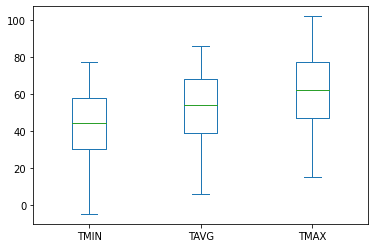

In [30]:
# sıcaklıkla alakalı olan sütunların tanımlayıcı istatistiklerini döndürelim
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

print("\n*****\n")

# sıcaklıkla alakalı olan sütunların kutu grafiğini çizdirelim
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')
plt.show()

Aşağıdaki kod bloğunda, maksimum ve minimum sıcaklıklar arasındaki farkı temsil eden TDIFF adlı yeni bir sütun oluşturalım. Ardından bu sütunun tanımlayıcı istatistiklerini döndürelim. Son olarak da bu sütunun histogram grafiğini çizdirelim.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64

*****



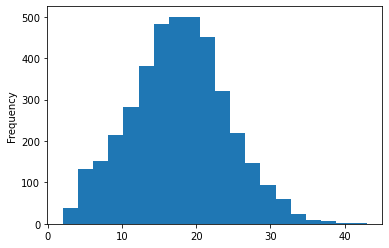

In [31]:
# TDIFF sütununu oluşturalım
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

# TDIFF sütununun tanımlayıcı istatistiklerini döndürelim
print(weather["TDIFF"].describe())

print("\n*****\n")

# TDIFF sütununun histogram grafiğini çizdirelim
weather["TDIFF"].plot(kind = "hist", bins = 20)
plt.show()

+ Sıcaklıklar arası açıklık (max değerler -min değerler) grafiği sağa çarpıktır. Yani ortalama, en sık tekrar eden değerden (mod) büyüktür.  

### < Categorizing the Weather (Hava Durumunun Sınıflandırılması) > 

Bu bölümde, her günki hava koşullarına bir derecelendirme vereceğiz. 

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri : 

+ pd.CategoricalDtype = Veri tipini değiştirmek istediğimiz sütundaki verilerin hangi sırada olacağını (büyüklük sıralaması) belirlememize olanak sağlar.

https://pandas.pydata.org/docs/reference/api/pandas.CategoricalDtype.html 

Aşağıdaki kod bloğunda, weather Dataframe'indeki WT01'den WT22 sütununa kadar olan sütunların olduğu yeni bir Dataframe'i WT adlı değişkene atayalım. Ardından WT Dataframe'indeki her satırın toplanmış halini weather Dataframe'ine "bad_conditions" adlı bir sütun olarak ekleyelim. Daha sonra bu sütundaki kayıp değerleri (NaN) 0'a eşitleyelim. Son olarak da bu sütunun histogram grafiğini çizdirelim. 

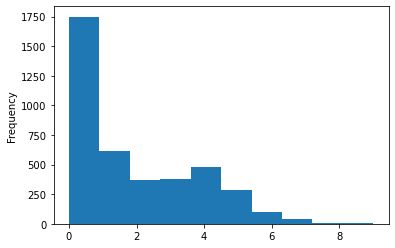


*****



0       2
1       2
2       3
3       4
4       4
       ..
4012    1
4013    0
4014    3
4015    2
4016    1
Name: bad_conditions, Length: 4017, dtype: int32

In [32]:
# 'WT01' ile 'WT22'yi yeni bir DataFrame'e kopyalayalım
WT = weather.loc[:, "WT01":"WT22"]

# 'WT'deki her satırın toplamını hesaplayalım
weather['bad_conditions'] = WT.sum(axis = "columns")

# "bad_conditions" içindeki eksik değerleri "0" ile değiştirelim
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# 'bad_conditions' görselleştirmek için bir histogram oluşturalım
weather["bad_conditions"].plot(kind = "hist")

# grafiği gösterelim
plt.show()

print("\n*****\n")

weather["bad_conditions"]

+ bad_conditions Dataframe'i WT01'den WT22'ye kadar olan sütunlardaki satırların değerlerinin toplamını içeren bir Dataframe olmuş oldu. Bu toplamlar, kötü hava koşullarının varlığını ifade etmekte.

Aşağıdaki kod bloğunda, ilk olarak yukarıda oluşturduğumuz bad_conditions adlı Dataframe'deki değerleri sıralayalım (**"xx.sort_index()"**) ve eşsiz değerlerden kaç tane olduğunu görelim (**"xx.value_counts()"**). Ardından eşsiz değerleri **"xx.map()"** işlevi ile string ifadelere dönüştüreceğiz ve weather Dataframe'inde "rating" adlı bir sütun olarak saklayacağız. Son olarak rating sütunundaki eşsiz değerleri **"xx.unique()"** işlevi ile yazdıracağız.

In [33]:
# 'bad_conditions' içindeki benzersiz değerleri sayalım ve dizini sıralayalım
print(weather["bad_conditions"].value_counts().sort_index())

print("\n*****\n")

# tamsayıları dizelere eşleyen bir sözlük oluşturalım
mapping = {0:'good', 1:'bad', 2:'bad', 3:"bad", 4:"bad", 5:"worse", 6:"worse", 7:"worse", 8:"worse", 9: "worse"}

# 'mapping'i kullanarak 'bad_conditions' tamsayılarını dizelere dönüştürelim
weather['rating'] = weather["bad_conditions"].map(mapping)

# 'rating'deki benzersiz değerleri sayalım
print(weather["rating"].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64

*****

bad      1836
good     1749
worse     432
Name: rating, dtype: int64


+ bad, worse, good artık kategorik bir hale geldi. Kategorik olmasına rağmen sıralı halde değiller. Bunu düzeltmeliyiz.

Aşağıdaki kod bloğunda, bad,worse,good eşsiz değerlerini **xx.CategoricalDtype()** işlevi ile sıralanmış bir hale getirelim. Bu işlemin sonunda worse, bad ve good eşsiz değerleri arasında sıralama olmuş olacak. Ardından **xx.astype()** işlevi ile rating sütununu kategorik hale getirelim ve ilk 5 satırını döndürelim.

In [34]:
# hava durumu derecelendirmelerinin mantıksal sırasını belirtelim
cats = pd.CategoricalDtype(['good', 'bad', 'worse'], ordered=True)

# 'rating' sütununun veri türünü kategori olarak değiştirelim
weather['rating'] = weather.rating.astype(cats)

# "rating" sütununun başını döndürelim
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


### < Merging Datasets (Veri Setlerini Birleştirme) > 

Hava durumu ve polis davranışının arasındaki ilişikiyi analiz edebilmemiz için bu iki Dataframe'i birleştirmemiz gerek. Bu bölümde bununla uğraşacağız.

Aşağıdaki kod bloğunda, birleştirilmeye hazır olmaları için trafik durdurma ve hava durumu DataFrame'lerini hazırlayalım. police DataFrame'indeki "stop_datetime" dizinini **"xx.reset_index()"** ile sütun haline getireceğiz çünkü dizin birleştirme sırasında kaybolacaktır. Ardından weather DataFrame'inden yalnızca "DATE" ve "rating" sütunlarını içeren weather_rating adlı yeni bir DataFrame oluşturalım. Daha sonra weather_rating Dataframe'inin ilk birkaç satırını döndürelim. 

In [35]:
# police dataframe'ini resetleyelim
# inplace parametresini True yapalım ki yaptığımız değişiklik kaydedilsin
police.reset_index(inplace = True)

# police dataframe'ine göz atalım
# index olarak duran stop_datetime, sütun haline gelmiş olacak 
print(police.head())

print("\n*****\n")

#'DATE' ve 'rating' sütunlarından bir DataFrame oluşturalım
weather_rating = weather[["DATE", "rating"]]

# gözden geçirelim weather_rating dataframe'ini
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender driver_race  \
0 2005-01-04 12:55:00  2005-01-04     12:55             M       White   
1 2005-01-23 23:15:00  2005-01-23     23:15             M       White   
2 2005-02-17 04:15:00  2005-02-17     04:15             M       White   
3 2005-02-20 17:15:00  2005-02-20     17:15             M       White   
4 2005-02-24 01:20:00  2005-02-24     01:20             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome  is_arrested stop_duration  drugs_related_stop district  \
0       Citation

Aşağıdaki kod bloğunda, police ve weather_rating DataFrame'lerini yeni bir DataFrame olan ri_weather'da birleştireceğiz. DataFrame'ler, ri'den stop_date sütunu ve weather_rating'den DATE sütununu **xx.merge()** kullanılarak birleştireceğiz. Neyse ki tarih biçimlendirmesi tam olarak eşleşiyor, ki bu her zaman böyle olmuyor! Birleştirme tamamlandığında, önceki alıştırmada kaydettiğiniz sütun olan stop_datetime'ı dizin olarak ayarlayacağız. 

In [36]:
# police dataframe'inin kaç satır-sütun olduğunu görelim
print("police dataframe shape : ",police.shape)

# police ve weather_rating dataframe'lerini sol birleştirme ile birleştirelim
police_weather = pd.merge(left=police, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# police_weather dataframe'inin kaç satır-sütun olduğunu görelim
print("police_weather dataframe shape :",police_weather.shape)

# police_weather dataframe'inde stop_datetime sütununu tekrardan index olarak ayarlayalım
police_weather.set_index('stop_datetime', inplace=True)

police dataframe shape :  (86536, 16)
police_weather dataframe shape : (86536, 18)


+ Sütun sayısına bakarak da birleştirildiğini, satır sayılarına bakarak da düzgün bir şekilde birleştirildiğini anlayabiliriz.

### < Does Weather Affect the Arrest Rate (Hava Durumu Tutuklanmayı Etkiler mi?) >  

Dördüncü başlık altında; buraya kadarki kısımlarda weather Dataframe'ini inceledik, kullanacağımız sütunların sınıflandırmasını yaptık ve police Dataframe'iyle birleştirdik. Bu bölümde hava durumunun tutuklamayı etkileyip etkilemediğini inceleyeceğiz ve ardından çok indeksli bir seri ile çalışacağız.

Bu bölümde kullandığımız bütün işlevler ve Tutorial Linkleri :

+ pd.pivot_table() = https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html?highlight=pivot_table#pandas.DataFrame.pivot_table

Çoklu sütunlardaki tek bir **"xx.groupby()"** işleminin çıktısı, MultiIndex içeren bir Seridir. Bu tür bir nesneyle çalışmak, bir DataFrame ile çalışmaya benzer. Bu yüzden Pandas'ın **MultiIndex.from_xx** işlevinin mantığını bilmeliyiz. Aşağıdaki kod bloklarında anlaşılmada güçlük olmaması amacıyla bu işlevi biraz açıklayalım.

+ Multi-Index, Multi-level (çok düzeyli) veya hierarchical (hiyerarşik) bir Pandas nesnesidir. Indeximizde (dizin) birden fazla satır ve sütun seçmemize olanak tanır.

+ **"MultiIndex.from_arrays"**, **"MultiIndex.from_tuples"**, **"MultiIndex.from_product"**, **"MultiIndex.from_frame"** olarak kullanılan çeşitli MultiIndex (Çoklu dizin) yöntemleri vardır. 

Tutorial Linki = https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html

In [37]:
import pandas as pd

# isimlerden oluşan bir dizi oluşturalım
names = ['Sohom','Suresh','kumkum','subrata']

# yaşlardan oluşan bir dizi oluşturalım
ages = [10, 11, 12, 13]

# işaretlerden oluşan bir dizi oluşturalım
marks = [90, 92, 23, 64]

# MultiIndex.from_arrays kullanarak, 
# dizileri adlarıyla birlikte bir araya getiriyoruz
# ve 3 dizideki her öğeyle farklı satırlarda çoklu dizin oluşturuyoruz.
pd.MultiIndex.from_arrays([names, ages, marks], names = ("names", "ages", "marks"))

MultiIndex([(  'Sohom', 10, 90),
            ( 'Suresh', 11, 92),
            ( 'kumkum', 12, 23),
            ('subrata', 13, 64)],
           names=['names', 'ages', 'marks'])

In [38]:
import pandas as pd 

# Bir veri oluşturalım
information = {"name": ["Saikat", "Shrestha", "Sandi", "Abinash"],
               
              "jobs": ["Software Developer", "System Engineer",
                        "Footballer", "Singer"],
               
              'Annual Salary(L.P.A)': [12.4, 5.6, 9.3, 10]}

# Bütün veriyi bir DataFrame'e dönüştürelim
df = pd.DataFrame(information)

# Veriyi inceleyelim 
print(df)

# Dataframe'den multiple index (çoklu dizin) oluşturalım
pd.MultiIndex.from_frame(df)

       name                jobs  Annual Salary(L.P.A)
0    Saikat  Software Developer                  12.4
1  Shrestha     System Engineer                   5.6
2     Sandi          Footballer                   9.3
3   Abinash              Singer                  10.0


MultiIndex([(  'Saikat', 'Software Developer', 12.4),
            ('Shrestha',    'System Engineer',  5.6),
            (   'Sandi',         'Footballer',  9.3),
            ( 'Abinash',             'Singer', 10.0)],
           names=['name', 'jobs', 'Annual Salary(L.P.A)'])

Aşağıdaki kod bloğunda, ilk olarak genel tutuklanma oranını bulacağız. Daha sonra, önceden oluşturduğumuz hava durumu derecelendirmelerinin ("rating sütunu") her biri için tutuklanma oranını hesaplayacağız. Son olarak tutuklanma oranında herhangi bir fark olup olmadığını görmek için ihlal türünü ("violation" sütunu) analize ikince bir faktör olarak ekleyeceğiz.

In [39]:
# Genel tutuklama oranını hesaplayalım
print(police_weather["is_arrested"].mean())

print("\n*****\n")

# rating sütunundaki satır için tutuklama oranını hesaplayalım
print(police_weather.groupby("rating")["is_arrested"].mean())

print("\n*****\n")

# Her bir 'ihlal (violation)' ve 'derecelendirme (rating)' için tutuklama oranını hesaplayalım
print(police_weather.groupby(["violation", "rating"]).is_arrested.mean())

0.0355690117407784

*****

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

*****

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64


Aşağıdaki kod bloğunda, rating ve violation için hesapladığımız tutuklanma oranlarını "arrest_rate" olarak kaydedelim. Ardından, kötü hava koşullarındaki hareket ihlallerinin tutuklama oranını yazdıralım. Son olarak da her üç hava koşulunda da hız ihlalleri için tutuklama oranlarını yazdıralım.

In [40]:
# arrest_rate adlı değişkene rating 
# rating ve violation için hesapladığımız tutuklanma oranlarını kaydedelim
arrest_rate = police_weather.groupby(['violation', 'rating']).is_arrested.mean()

# arrest_rate serisini yazdıralım
print(arrest_rate)

print("\n*****\n")

# kötü hava koşullarında hareket ihlalleri için tutuklama oranını yazdıralım
print(arrest_rate.loc['Moving violation', 'bad'])

print("\n******\n")

# Üç hava koşulunda da hız ihlalleri için tutuklama oranlarını yazdıralım
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

*****

0.05804964058049641

******

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


+ Çoklu sütunlardaki tek bir **"xx.groupby()"** işleminin çıktısı, MultiIndex içeren bir Seridir. Bu tür bir nesneyle çalışmak, bir DataFrame ile çalışmaya benzer.

Aşağıdaki kod bloğunda, yukarı **"xx.groupby()"** işlevi ile oluşturduğumuz Dataframe'i, **"xx.pivot_table()"** işlevi ile rahat bir şekilde oluşturalım. Ancak ondan önce arrest_rate serisini Dataframe olarak şekilldendirmek için **xx.unstack()** işlevi ile yığından ayıracağız.

In [41]:
# 'arrest_rate' Serisini bir DataFrame'e ayıralım
print(arrest_rate.unstack())

# pivot_table kullanarak aynı DataFrame'i oluşturalım
print(police_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
